In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# players_21 data files
players_data_path = "data/players_21.csv"

# Read the players data
df = pd.read_csv(players_data_path)

# Display the data table for preview
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [3]:
# Check height and weight columns if they have the appropriate data type (should be in integers int64)
df[['height_cm', 'weight_kg']].dtypes

height_cm    int64
weight_kg    int64
dtype: object

In [4]:
# Check datatype of 'joined' column
df['joined'].dtypes

dtype('O')

In [5]:
# Convert 'joined' column into datatime, 
df['joined'] = pd.to_datetime(df['joined'], errors='coerce')

# then extract the year, month, and day into 3 separate cols
df['joined_year'] = df['joined'].dt.year
df['joined_month'] = df['joined'].dt.month
df['joined_day'] = df['joined'].dt.day

# Display the results
df[['joined', 'joined_year', 'joined_month', 'joined_day']].head()

,joined,joined_year,joined_month,joined_day
0,2004-07-01,2004.0,7.0,1.0
1,2018-07-10,2018.0,7.0,10.0
2,2014-07-16,2014.0,7.0,16.0
3,2014-07-01,2014.0,7.0,1.0
4,2017-08-03,2017.0,8.0,3.0


In [6]:
# Check datatype of 'value, wage, release clause' cols
df[['value_eur', 'wage_eur', 'release_clause_eur']].dtypes

value_eur               int64
wage_eur                int64
release_clause_eur    float64
dtype: object

In [7]:
# Convert float to int
df['release_clause_eur'] = df['release_clause_eur'].fillna(0).astype(int)

# Verify the change
df[['release_clause_eur']].dtypes

release_clause_eur    int32
dtype: object

In [8]:
# Display the results of the 3 cols
df[['value_eur', 'wage_eur', 'release_clause_eur']].head()

,value_eur,wage_eur,release_clause_eur
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,80000000,240000,132000000
4,90000000,270000,166500000


In [9]:
df['contract_valid_until'].dtypes

dtype('float64')

In [10]:
# Convert to int
df['contract_valid_until'] = df['contract_valid_until'].fillna(0).astype(int)

In [11]:
# Check if there's missing values in the dataset
missing_values = df.isnull().sum()
missing_values

sofifa_id         0
player_url        0
short_name        0
long_name         0
age               0
               ... 
rcb               0
rb                0
joined_year     983
joined_month    983
joined_day      983
Length: 109, dtype: int64

## Analyzing Contract Expiration Trend
- Explore trends in contract expiration dates across clubs or nationalities

In [13]:
# 

## Player Performance vs Wage
- Analyze if younger players tend to have higher potential values compared to older players.

In [15]:
#


## Position Analysis
- Analyze which positions (forwards, midfielders, etc) have the highest overall ratings or wage

In [17]:
# Create a data frame of the analysis of performance

#Calculate the Analysis
minimum = df['overall'].min()
Q1 = df['overall'].quantile(0.25)
median = df['overall'].median()
Q3 = df['overall'].quantile(0.75)
maximum = df['overall'].max()

#Create a dictionary for the DFs

analysis_of_performance = {
    'Minimum': minimum,
    'Q1 (25th Percentile)': Q1,
    'Median (50th Percentile)': median,
    'Q3 (75th Percentile)': Q3,
    'Maximum': maximum
}

# Create a DataFrame from the dictionary
analysis_of_performance_df = pd.DataFrame(analysis_of_performance, index=[0])

# Display the DataFrame
display(analysis_of_performance_df)



,Minimum,Q1 (25th Percentile),Median (50th Percentile),Q3 (75th Percentile),Maximum
0,47,61.0,66.0,70.0,93


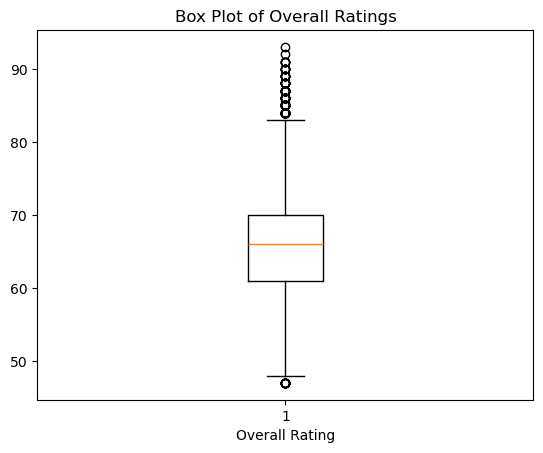

In [18]:

plt.boxplot(df['overall'])  

# Add titles and labels
plt.title('Box Plot of Overall Ratings')
plt.xlabel('Overall Rating')

# Show the plot
plt.show()

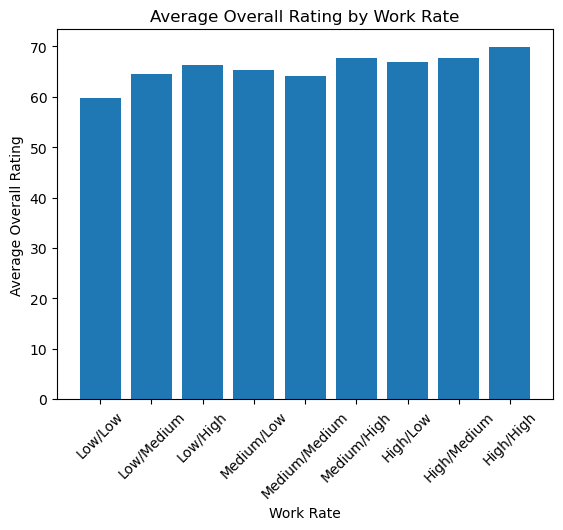

In [19]:
# Desired order of player positions
work_order = ['Low/Low', 'Low/Medium', 'Low/High', 'Medium/Low', 'Medium/Medium', 'Medium/High', 'High/Low', 'High/Medium', 'High/High']

# Calculate the average overall rating for each player position
avg_overall_by_work_rate = df.groupby('work_rate')['overall'].mean().reset_index()

# Convert player_position to a categorical type with the specified order
avg_overall_by_work_rate['work_rate'] = pd.Categorical(avg_overall_by_work_rate['work_rate'], categories=work_order, ordered=True)

# Sort the DataFrame by the ordered work_rate
avg_overall_by_work_rate = avg_overall_by_work_rate.sort_values('work_rate')

# Create the bar graph
plt.bar(avg_overall_by_work_rate['work_rate'], avg_overall_by_work_rate['overall'])

# Add titles and labels
plt.title('Average Overall Rating by Work Rate')
plt.xlabel('Work Rate')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [25]:
# Performing ANOVA
anova_result = st.f_oneway(
    df[df['work_rate'] == 'Low/Low']['overall'],
    df[df['work_rate'] == 'Low/Medium']['overall'],
    df[df['work_rate'] == 'Low/High']['overall'],
    df[df['work_rate'] == 'Medium/Low']['overall'],
    df[df['work_rate'] == 'Medium/Medium']['overall'],
    df[df['work_rate'] == 'Medium/High']['overall'],
    df[df['work_rate'] == 'High/Low']['overall'],
    df[df['work_rate'] == 'High/Medium']['overall'],
    df[df['work_rate'] == 'High/High']['overall']
)

print('ANOVA result:', anova_result)



ANOVA result: F_onewayResult(statistic=180.8932193094758, pvalue=7.803327969335649e-296)


In [27]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['overall'],    
                          groups=df['work_rate'],  
                          alpha=0.05)            

# Display the test results
print(tukey)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
  High/High      High/Low  -2.9987    0.0  -3.9903 -2.0071   True
  High/High   High/Medium  -2.1195    0.0  -2.8626 -1.3763   True
  High/High      Low/High  -3.5564    0.0  -4.7432 -2.3695   True
  High/High       Low/Low -10.0688    0.0 -13.0183 -7.1194   True
  High/High    Low/Medium  -5.4298    0.0  -6.5852 -4.2743   True
  High/High   Medium/High  -2.2234    0.0  -3.0414 -1.4053   True
  High/High    Medium/Low  -4.5765    0.0  -5.5282 -3.6249   True
  High/High Medium/Medium  -5.6773    0.0  -6.3624 -4.9923   True
   High/Low   High/Medium   0.8792 0.0274   0.0517  1.7068   True
   High/Low      Low/High  -0.5577 0.9007  -1.7991  0.6838  False
   High/Low       Low/Low  -7.0701    0.0  -10.042 -4.0983   True
   High/Low    Low/Medium  -2.4311    0.0  -3.6425 -1.2196   True
   High/Lo